# Regressão Linear

In [52]:
import pandas as pd # conventional alias
from sklearn.datasets import load_boston
dataset = load_boston()

In [53]:
print("dataset.keys():\n{}".format(dataset.keys()))

dataset.keys():
dict_keys(['DESCR', 'feature_names', 'target', 'data'])


### 0 - Felipe Malcher - 0050013188

### 1 - Mostre os primeiros registros da tabela.

In [54]:
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
#df['target'] = dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 2 - Observações(linhas) possui nessa base? quantas colunas?

In [55]:
print(data.shape)

(506, 13)


### 3 - Quantas features possui?

In [56]:
print (dataset.feature_names)

# 13 features

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### 4 - Qual é o campo target(respostas) dessa base?

In [57]:
#print (dataset.target)
data['target'] = dataset.target
print(data['target'])

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, dtype: float64


### 5 - Usando a biblioteca de visualização seaborn , plot o gráfico que mostra a relação entre as features e responses.

In [58]:
import seaborn as sns
%matplotlib inline

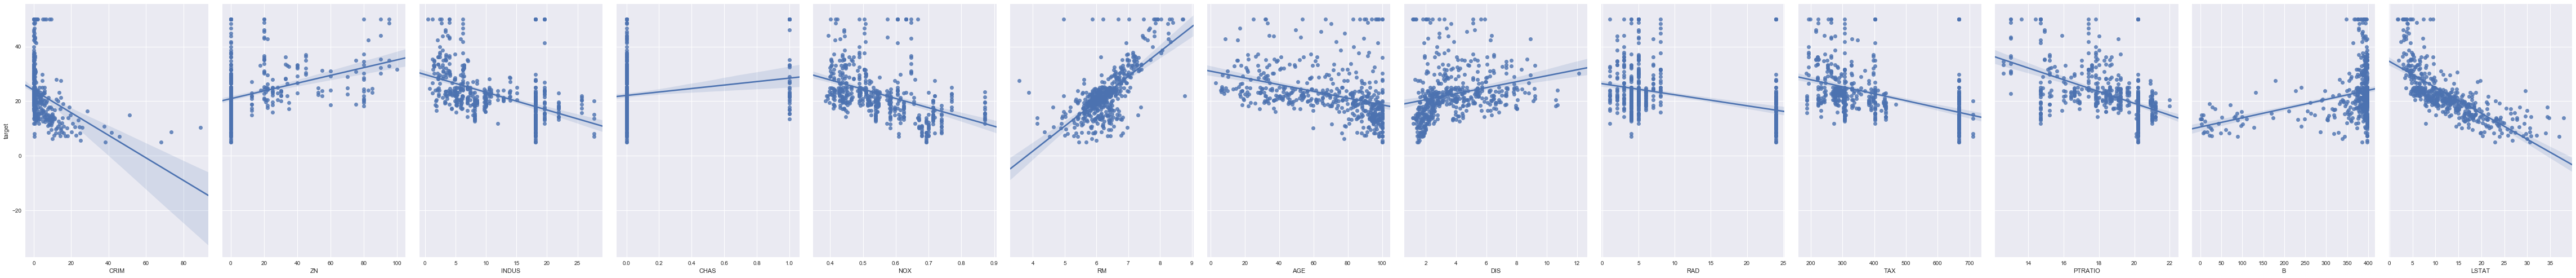

In [59]:
sns.pairplot(data, x_vars=['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], y_vars='target', size=7, aspect=0.7, kind='reg')

### 6 - Prepare x e y usando pandas.

In [60]:
feature_cols = ['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
x = data[feature_cols]

x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [61]:
y = data['target']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

### 7 - Qual o tipo de dados de x e y?

In [62]:
print (type(x))
print (type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### 8 - Sobre o que se trata essa base de dados? Que tipo de informações ela guarda?

In [63]:
print (dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 9 - Gere um x de treino e y de treino, x de teste e y da base(Split Train/Test)

In [68]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)

### 10 - Qual o percentual gerado para criar o conjunto de treino e o conjunto de teste?

##### Teste   - 0.4
##### Treino - 0.6

### 11 - Usando modelo de regressão linear do sklearn, treine o modelo com o x e y de treino

In [70]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [71]:
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 12 - Imprima os atributos de "intercept" e "coefficients" que foram gerados

In [74]:
print(linreg.intercept_)
print(linreg.coef_)

31.1518051753
[ -9.11634623e-02   4.97311579e-02   1.04332182e-02   2.57824667e+00
  -1.53472648e+01   3.87674688e+00  -6.45064385e-03  -1.46993464e+00
   3.30364542e-01  -1.56834777e-02  -7.27226512e-01   9.47079274e-03
  -4.69419821e-01]


### 13 - Imprima o par "feature names" com os "coefficients"

In [83]:
print(dataset.feature_names, linreg.coef_)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] [ -9.11634623e-02   4.97311579e-02   1.04332182e-02   2.57824667e+00
  -1.53472648e+01   3.87674688e+00  -6.45064385e-03  -1.46993464e+00
   3.30364542e-01  -1.56834777e-02  -7.27226512e-01   9.47079274e-03
  -4.69419821e-01]


### 14 - Faça uma previsão usando o conjunto X de teste

In [85]:
y_pred = linreg.predict(x_test)

In [88]:
import numpy as np
from sklearn import metrics

In [89]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5.43803235309


### 15 - Existe uma forma de melhorar essa margem para que fique menor? Se sim, como seria?

#### Desconsiderando algumas features cujo gráficos são incertos na hora de fazer o treino